### Угадываем пол спортсмена

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv( 'athletes.csv' )
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


#### Попробуем угадать пол на основе роста, веса и вида спорта

In [3]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [4]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'height', 'weight', 'sport', 'sex' ] ]
X = pd.get_dummies( selectedColumns, columns = [ 'sport' ] )

del X['sex']

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['sex'] )
y = pd.Series( data = le.transform( data['sex'] ) )

### Строим модель и предсказания predictions

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size = 0.3, random_state = 0 )

In [7]:
model = LogisticRegression()

In [16]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### По значениям y_test и predictions считаем precision-recall и ROC

In [17]:
from sklearn.metrics import roc_curve, precision_recall_curve

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
predictions = model.predict_proba(X_test)

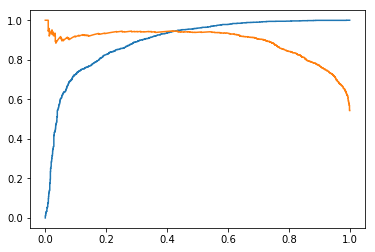

In [24]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
plt.plot( fpr, tpr)
plt.plot( re, pr )

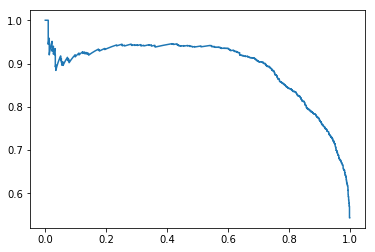

In [21]:
plt.plot( re, pr )

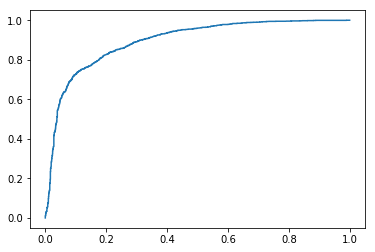

In [23]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
plt.plot( fpr, tpr)

In [25]:
from sklearn.metrics import auc

In [26]:
auc( fpr, tpr )

0.8944003912059095

In [27]:
from sklearn.metrics import average_precision_score
average_precision_score( Y_test, predictions[:, 1] )

0.8922134641175142

In [28]:
auc( re, pr )

0.8921222845475358